In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
from collections import Counter
from scipy.stats import mannwhitneyu

# Objective
This notebook plots the violin plots for the max area in both an aggregate and seasonal (somewhat subjective sense) for the updated and final ARs

In [2]:
#bring in the data we need
non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_Non_MJO_ARs_UPDATE.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

mjo_act_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Active_ARs_UPDATE.csv')
mjo_act_og = mjo_act_og.drop(columns=['Unnamed: 0'])
mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Connected_ARs_UPDATE.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

## Overall

In [4]:
non_mjo_erm = []
for i in range(0,len(non_mjo_og)):
    ar_test = xr.open_dataset(non_mjo_og['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    non_mjo_erm += [area]

non_mjo_erm = np.array(non_mjo_erm)
non_mjo_erm = np.concatenate(non_mjo_erm)

In [5]:
mjo_act_erm = []
for i in range(0,len(mjo_act_og)):
    ar_test = xr.open_dataset(mjo_act_og['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    mjo_act_erm += [area]

mjo_act_erm = np.array(mjo_act_erm)
mjo_act_erm = np.concatenate(mjo_act_erm)

In [6]:
mjo_erm = []
for i in range(0,len(mjo_og)):
    ar_test = xr.open_dataset(mjo_og['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    mjo_erm += [area]

mjo_erm = np.array(mjo_erm)
mjo_erm = np.concatenate(mjo_erm)

In [7]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

3211363.4705528845
8611606.0
240297.84375
2919335.625


In [8]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

3219224.9612877155
9096927.0
241236.453125
2983028.875


In [9]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

3850177.787937743
10731620.0
439306.15625
3745046.5


In [10]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

312
580
257


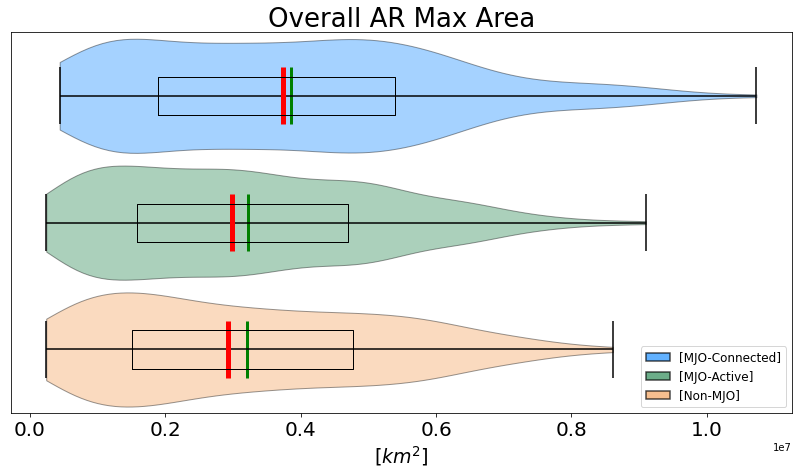

In [11]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Overall AR Max Area', fontsize=titlesize)
ax.set_xlabel('[$km^{2}$]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Max_Area/Overall_Area.png", dpi=350, bbox_inches='tight')
plt.show()

In [12]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

7.194743467664466e-09
3.194290665309296e-11
1.5865696241235128e-06


In [13]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

#MJO-Connected case is statistically larger than the other two!

0.8115387314171644
0.00027891557264399865
0.0010778529355280901
0.4057693657085822
0.00013945778632199932
0.0005389264677640451


## DJFM


In [24]:
#mjo not active

dec=non_mjo_og[non_mjo_og['Month'] == 12]
jan=non_mjo_og[non_mjo_og['Month'] == 1]
feb=non_mjo_og[non_mjo_og['Month'] == 2]
mar=non_mjo_og[non_mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

non_mjo_erm = []
for i in range(0,len(CA_non_DJF)):
    ar_test = xr.open_dataset(CA_non_DJF['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    non_mjo_erm += [area]

non_mjo_erm = np.array(non_mjo_erm)
non_mjo_erm = np.concatenate(non_mjo_erm)

In [25]:
#mjo active

dec=mjo_act_og[mjo_act_og['Month'] == 12]
jan=mjo_act_og[mjo_act_og['Month'] == 1]
feb=mjo_act_og[mjo_act_og['Month'] == 2]
mar=mjo_act_og[mjo_act_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_act_erm = []
for i in range(0,len(CA_non_DJF)):
    ar_test = xr.open_dataset(CA_non_DJF['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    mjo_act_erm += [area]

mjo_act_erm = np.array(mjo_act_erm)
mjo_act_erm = np.concatenate(mjo_act_erm)

In [26]:
#mjo connected
dec=mjo_og[mjo_og['Month'] == 12]
jan=mjo_og[mjo_og['Month'] == 1]
feb=mjo_og[mjo_og['Month'] == 2]
mar=mjo_og[mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_erm = []
for i in range(0,len(CA_non_DJF)):
    ar_test = xr.open_dataset(CA_non_DJF['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    mjo_erm += [area]

mjo_erm = np.array(mjo_erm)
mjo_erm = np.concatenate(mjo_erm)

In [27]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

3137990.1666666665
7751744.0
483399.8125
3251517.5


In [28]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

3107717.4612103174
8927059.0
314331.4375
2881682.25


In [29]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

4010875.755952381
10731620.0
481711.5625
3972696.75


In [30]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

42
315
105


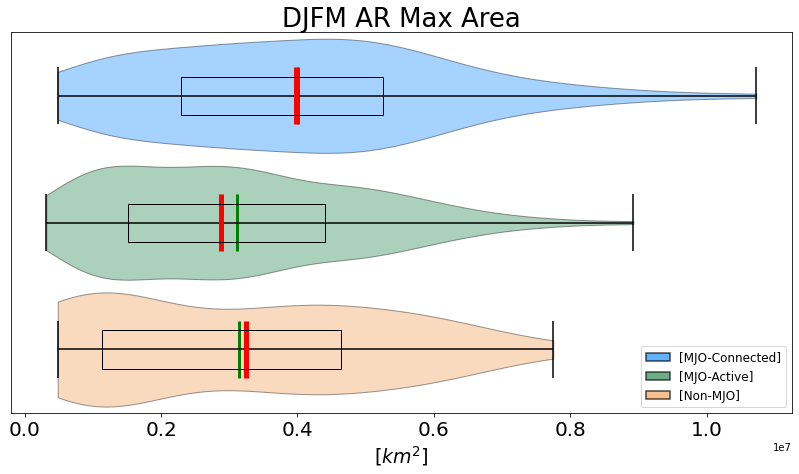

In [31]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('DJFM AR Max Area', fontsize=titlesize)
ax.set_xlabel('[$km^{2}$]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Max_Area/DJFM_Area.png", dpi=350, bbox_inches='tight')
plt.show()

In [32]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

0.004727787338197231
1.0972640041018167e-07
0.026470284909009933


In [33]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

# MJO-Connected is larger than botb by a significant margin

0.893006326532813
0.00015557799591674122
0.029229588698204734
0.4465031632664065
7.778899795837061e-05
0.014614794349102367


## Overall Seasons


In [85]:
all_ivt = pd.concat([non_mjo_og,mjo_act_og,mjo_og], ignore_index=True)

jan = all_ivt[all_ivt['Month'] == 1]
feb= all_ivt[all_ivt['Month'] == 2]
mar= all_ivt[all_ivt['Month'] == 3]
apr= all_ivt[all_ivt['Month'] == 4]
may= all_ivt[all_ivt['Month'] == 5]
jun= all_ivt[all_ivt['Month'] == 6]
jul= all_ivt[all_ivt['Month'] == 7]
aug= all_ivt[all_ivt['Month'] == 8]
sep= all_ivt[all_ivt['Month'] == 9]
oct= all_ivt[all_ivt['Month'] == 10]
nov= all_ivt[all_ivt['Month'] == 11]
dec= all_ivt[all_ivt['Month'] == 12]


winter=pd.concat([dec, jan, feb], ignore_index=True)
spring=pd.concat([mar, apr, may], ignore_index=True)
summer=pd.concat([jun, jul, aug], ignore_index=True)
fall=pd.concat([sep, oct, nov], ignore_index=True)


winter_ivt = []
for i in range(0,len(winter)):
    ar_test = xr.open_dataset(winter['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    winter_ivt += [area]

winter_ivt = np.array(winter_ivt)
winter_ivt = np.concatenate(winter_ivt)

spring_ivt = []
for i in range(0,len(spring)):
    ar_test = xr.open_dataset(spring['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    spring_ivt += [area]

spring_ivt = np.array(spring_ivt)
spring_ivt = np.concatenate(spring_ivt)

summer_ivt = []
for i in range(0,len(summer)):
    ar_test = xr.open_dataset(summer['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    summer_ivt += [area]

summer_ivt = np.array(summer_ivt)
summer_ivt = np.concatenate(summer_ivt)

fall_ivt = []
for i in range(0,len(fall)):
    ar_test = xr.open_dataset(fall['AR ID (string)'].iloc[i])

    area = ar_test['maxarea'].values
    fall_ivt += [area]

fall_ivt = np.array(fall_ivt)
fall_ivt = np.concatenate(fall_ivt)


In [86]:
print(winter_ivt.mean())
print(winter_ivt.max())
print(winter_ivt.min())
print(np.median(winter_ivt))

3594659.753196023
10731620.0
314331.4375
3388675.5


In [87]:
print(spring_ivt.mean())
print(spring_ivt.max())
print(spring_ivt.min())
print(np.median(spring_ivt))

2721463.14686214
7618378.5
240297.84375
2299801.25


In [88]:
print(summer_ivt.mean())
print(summer_ivt.max())
print(summer_ivt.min())
print(np.median(summer_ivt))

3619871.100770925
8957235.0
245609.640625
3554861.5


In [89]:
print(fall_ivt.mean())
print(fall_ivt.max())
print(fall_ivt.min())
print(np.median(fall_ivt))

3396664.7052818253
9413854.0
241236.453125
3084846.125


In [90]:
print(len(winter_ivt))
print(len(spring_ivt))
print(len(summer_ivt))
print(len(fall_ivt))

352
243
227
326


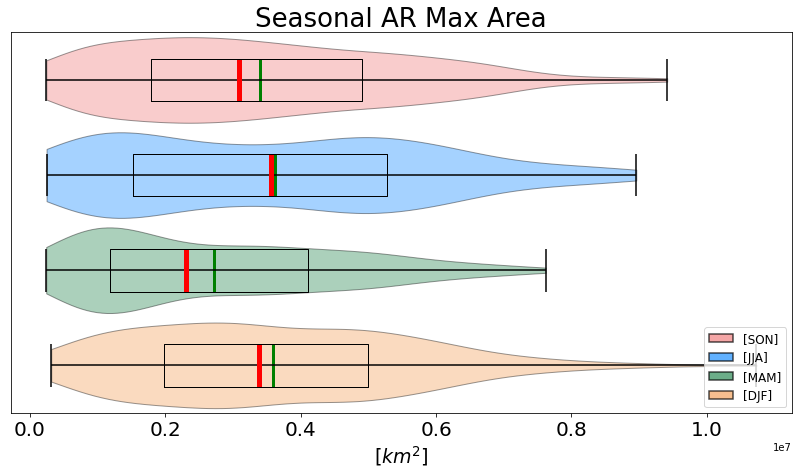

In [91]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [winter_ivt,spring_ivt,summer_ivt,fall_ivt]
type_labels = ['[DJF]', '[MAM]','[JJA]', '[SON]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue', 'lightcoral']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Seasonal AR Max Area', fontsize=titlesize)
ax.set_xlabel('[$km^{2}$]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Max_Area/Seas_Area.png", dpi=350, bbox_inches='tight')
plt.show()

In [92]:
from scipy.stats import shapiro
# data_area = [winter_ivt,spring_ivt,summer_ivt,fall_ivt]
stat, p_value = shapiro(winter_ivt)
print(p_value)
stat, p_value = shapiro(spring_ivt)
print(p_value)
stat, p_value = shapiro(summer_ivt)
print(p_value)
stat, p_value = shapiro(fall_ivt)
print(p_value)
#none normal

1.9680253444676055e-06
1.155144979669842e-09
5.855106905983121e-07
1.7786477712888882e-07


In [94]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(winter_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(winter_ivt, summer_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(winter_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(spring_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(spring_ivt, summer_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(spring_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(summer_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(summer_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(summer_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(fall_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(fall_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(fall_ivt, summer_ivt, alternative='two-sided')
print(p_value)

#go through later but a lot of difference

5.9415762073960274e-08
0.8933369425983565
0.17859441081738192
5.9415762073960274e-08
3.47973453981136e-05
7.19560754146001e-05
0.8933369425983565
3.47973453981136e-05
0.379460796440516
0.17859441081738192
7.19560754146001e-05
0.379460796440516
